In [27]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['axes.titlesize'] = 24
plt.rc('legend', fontsize=20)
import seaborn as sns
sns.set_style("whitegrid")



green_color_pal = sns.color_palette("Greens", 10)
blue_color_pal = sns.color_palette("Blues", 10)
red_color_pal = sns.color_palette("Reds", 10)
purple_color_pal = sns.color_palette("Purples", 10)

plot_dict = {
    "RPFP": ("HDB-RPFP", red_color_pal[4]),
    "Combo": ("HDB-Combo", purple_color_pal[5]),
            #   "HDBind (10k) (GPU-no encode)": green_color_pal[8],
              "MoLFormer": ("HDB-MoLFormer", green_color_pal[7]),
              # "MoLFormer+RPFP": ("HDB Combo", green_color_pal[9]),
              "MolCLR": ("HDB-MolCLR", green_color_pal[4]),
              "DECFP-4": ("HDB-DECFP", red_color_pal[8]),
              "MLP": ("MLP", "black"),
    }

RPFP
MoLFormer
MoLFormer+RPFP
MolCLR
DECFP-1
DECFP-2
DECFP-4
Combo
MLP


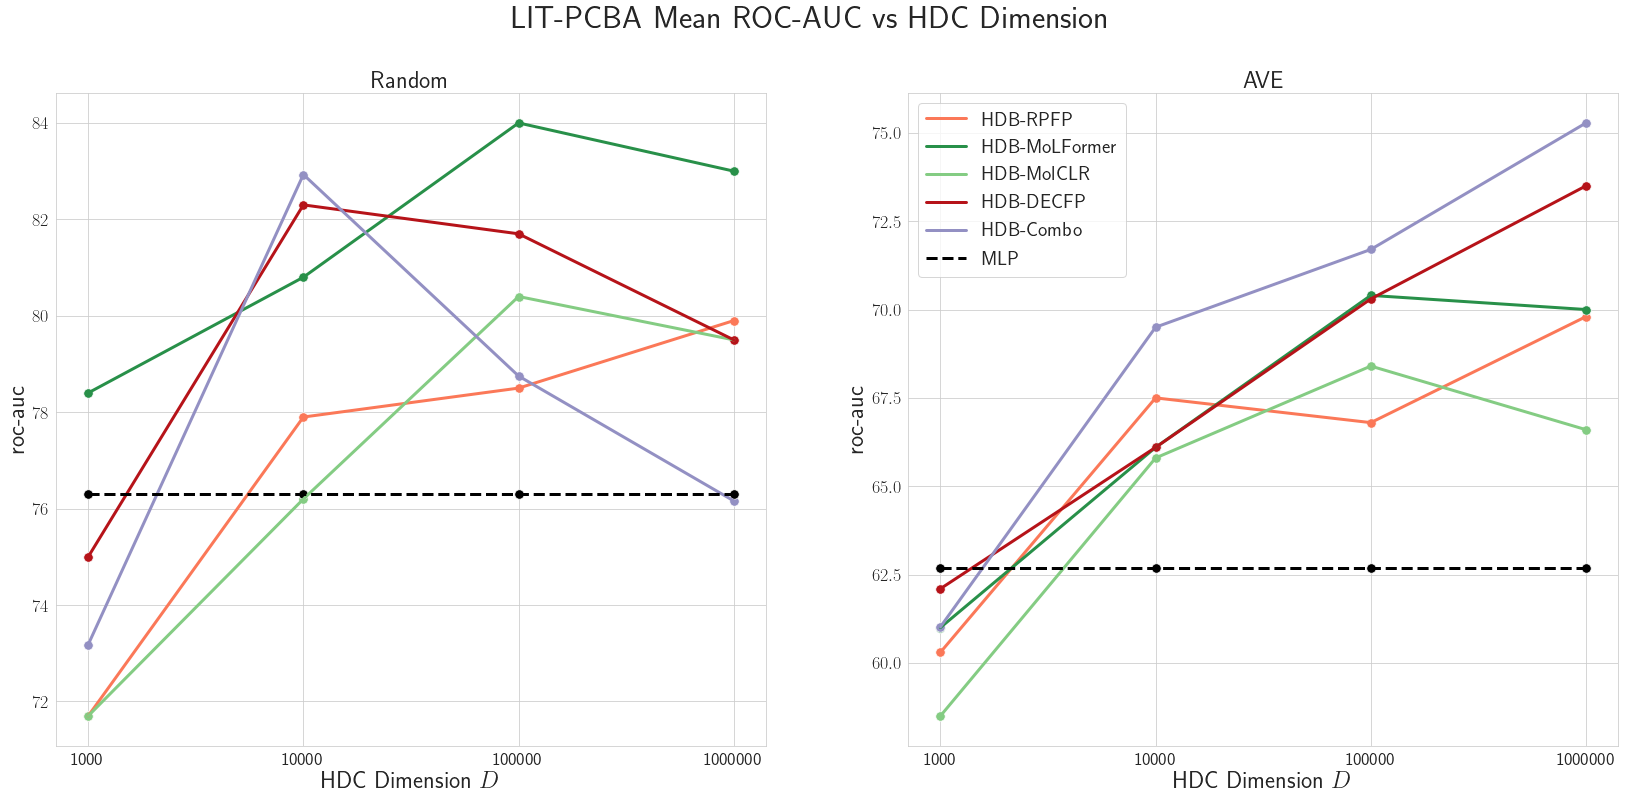

In [28]:
import pandas as pd

df = pd.read_csv("/g/g13/jones289/workspace/hd-cuda-master/notebooks/hdbbind_litpcba_roc_auc.csv")
df["D"] = df["D"].astype(int)
# df.loc[df["Feature"] == "MoLFormer+RPFP","Feature"] = ["HDB-Combo"]*5
df = df[df["D"] != 100]


f,ax = plt.subplots(1,2, figsize=(28,12), sharex=True)

for grp, grp_df in df.groupby("Feature", sort=False): # keep sort equal to false to MLP is last entry in legend


    print(grp)

    if grp in plot_dict.keys():

        grp_df["idx"] = list(range(len(grp_df)))


        label = plot_dict[grp][0]
        color = plot_dict[grp][1]

        if grp == "MLP":
            sns.lineplot(x="idx", y="Random", data=grp_df, ax=ax[0],  linewidth=3, linestyle="--", color=color)
            sns.lineplot(x="idx", y="Ave", data=grp_df, ax=ax[1], label=label, linewidth=3, linestyle="--", color=color)
            sns.scatterplot(x="idx", y="Random", data=grp_df, ax=ax[0], s=90, color=color)
            sns.scatterplot(x="idx", y="Ave", data=grp_df, ax=ax[1], s=90, color=color)

        elif grp == "DECFP":
            sns.lineplot(x=[0,1,2], y=grp_df.iloc[[0,1,2]]["Random"], ax=ax[0],  linewidth=3, color=color)
            sns.lineplot(x=[0,1,2], y=grp_df.iloc[[0,1,2]]["Ave"], ax=ax[1], label=label,linewidth=3, color=color)
            sns.scatterplot(x=[0,1,2], y=grp_df.iloc[[0,1,2]]["Random"], ax=ax[0],s=90, color=color)
            sns.scatterplot(x=[0,1,2], y=grp_df.iloc[[0,1,2]]["Ave"], ax=ax[1], s=90, color=color)
            # sns.lineplot(x="idx", y="Ave", data=grp_df, ax=ax[1], label=grp, linewidth=3, linestyle="--", color="black")
            # sns.scatterplot(x="idx", y="Random", data=grp_df, ax=ax[0], s=90, color="black")
            # sns.scatterplot(x="idx", y="Ave", data=grp_df, ax=ax[1], s=90, color="black")

        else:
            sns.lineplot(x="idx", y="Random", data=grp_df, ax=ax[0],  linewidth=3, color=color)
            sns.lineplot(x="idx", y="Ave", data=grp_df, ax=ax[1], label=label,linewidth=3, color=color)
            
            sns.scatterplot(x="idx", y="Random", data=grp_df, ax=ax[0], s=90, color=color)
            sns.scatterplot(x="idx", y="Ave", data=grp_df, ax=ax[1], s=90, color=color)

        
        ax[0].set_title("Random")
        ax[1].set_title("AVE")
        
        ax[0].set_ylabel("roc-auc")
        ax[1].set_ylabel("roc-auc")
        # plt.xticks([0, 1, 2, 3, 4], ['100', '1000', '10000', '100000', '1000000'])
        plt.xticks([0, 1, 2, 3], ['1000', '10000', '100000', '1000000'])
        ax[0].set_xlabel("$D$")
        ax[1].set_xlabel("$D$")

ax[0].tick_params(labelsize=18)
ax[1].tick_params(labelsize=18)

ax[0].set_xlabel("HDC Dimension $D$", fontsize=24)
ax[1].set_xlabel("HDC Dimension $D$", fontsize=24)
ax[0].set_ylabel("roc-auc", fontsize=24)
ax[1].set_ylabel("roc-auc", fontsize=24)
# plt.tight_layout()
# handles, labels = plt.gca().get_legend_handles_labels()
# result = plt.gca().get_legend_handles_labels()

# import pdb
# pdb.set_trace()
# Sort the handles and labels
# handles, labels = sorted(list(zip(handles, labels)), key=lambda x: x[1])

# Add the sorted handles and labels to the legend
# plt.legend(handles, labels)
# ax[0].set_yscale("log")
# ax[1].set_yscale("log")
f.suptitle("LIT-PCBA Mean ROC-AUC vs HDC Dimension", fontsize=32)
plt.savefig("lit-pcba-rocauc-lineplot.png", dpi=450)